In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [31]:

# Load data
url_red = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

red_wine = pd.read_csv(url_red, sep=';')


In [36]:
# Check read in data

print(f"Red Wine Data Shape: {red_wine.shape}\n\n")
print(f"Red Wine Data:\n{red_wine.head()}")
print(f"\nQuality Classes: \n{red_wine.quality.value_counts()}")

Red Wine Data Shape: (1599, 12)


Red Wine Data:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4     

In [33]:
# Scale features for red wine data only
red_scaled_features = scaler.fit_transform(red_wine.drop(['quality'], axis=1))

# Applying PCA to red wine only
pca_red = PCA()
red_wine_pca = pca_red.fit_transform(red_scaled_features)

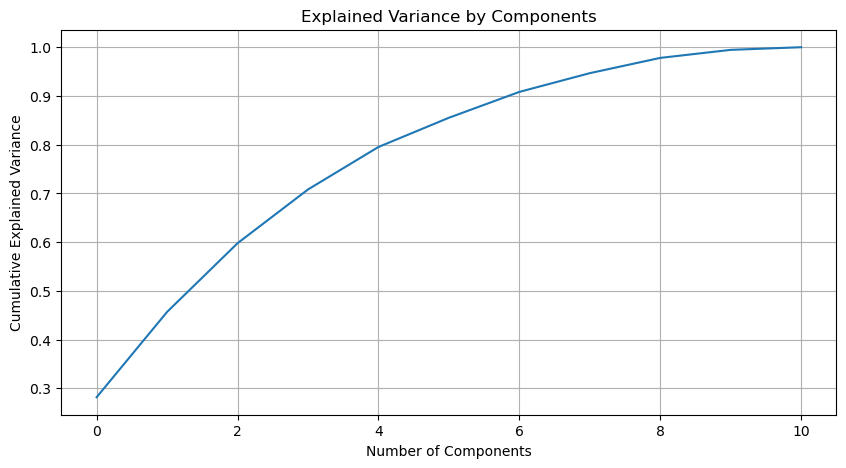

In [34]:
# Explained variance plot red wine
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca_red.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()



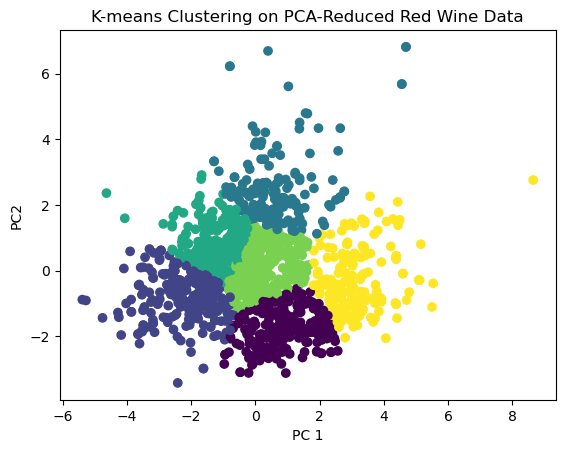

In [39]:
# Clustering on the reduced data for visualization purposes
kmeans = KMeans(n_clusters=6)
clusters = kmeans.fit_predict(red_wine_pca[:, :2])

# Visualize clusters
plt.scatter(red_wine_pca[:, 0], red_wine_pca[:, 1], c=clusters, cmap='viridis')
plt.title('K-means Clustering on PCA-Reduced Red Wine Data')
plt.xlabel('PC 1')
plt.ylabel('PC2')
plt.show()
